In [19]:
#package imports
import numpy as np 
import pandas as pd  
import random

#Matplotlib is a data visualization library for python 
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
#Seaborn is another library that is based on matplotlib
import seaborn as sns
#seaborn.set()  # set plot styles 


In [20]:
battery = pd.read_csv('Battery Experiment Data VF.csv')

# Hypothesis: 
- We believe that the Energizer batteries will have the lowest rate of depletion. 

- Also, based on previous research, we concluded that batteries will perform better (have lower rates) in cooler temperatures.


In [21]:
#Entire dataframe:
battery

,Brand,Scientist,Condition,Temp (F),Start Charge 1,End Charge 1,Rate per Hour 1,Start Charge 2,End Charge 2,Rate per Hour 2,Start Charge 3,End Charge 3,Rate per Hour 3
0,Micropower,Everyone,Room Temp,70,1.50,1.36,0.28,1.36,1.30,0.12,1.30,1.29,0.02
1,Micropower,Everyone,Room Temp,70,1.51,1.36,0.30,1.36,1.30,0.12,1.30,1.28,0.04
2,Micropower,Everyone,Room Temp,70,1.52,1.36,0.32,1.36,1.31,0.10,1.31,1.29,0.04
3,Micropower,Everyone,Room Temp,70,1.51,1.35,0.32,1.35,1.27,0.16,1.27,1.26,0.02
4,Micropower,Everyone,Cold,38,1.63,1.42,0.42,1.42,1.33,0.18,1.33,1.29,0.08
5,Micropower,Everyone,Cold,38,1.63,1.41,0.44,1.41,1.32,0.18,1.32,1.28,0.08
6,Micropower,Everyone,Cold,38,1.63,1.40,0.46,1.40,1.31,0.18,1.31,1.27,0.08
7,Micropower,Everyone,Cold,38,1.63,1.41,0.44,1.41,1.30,0.22,1.30,1.27,0.06
8,Micropower,Everyone,Hot,90,1.61,1.44,0.34,1.44,1.38,0.12,1.38,1.34,0.08
9,Micropower,Everyone,Hot,90,1.61,1.43,0.36,1.43,1.37,0.12,1.37,1.33,0.08


In [22]:
battery.dtypes 
#All data types seem to be correct

Brand               object
Scientist           object
Condition           object
Temp (F)             int64
Start Charge 1     float64
End Charge 1       float64
Rate per Hour 1    float64
Start Charge 2     float64
End Charge 2       float64
Rate per Hour 2    float64
Start Charge 3     float64
End Charge 3       float64
Rate per Hour 3    float64
dtype: object

In [23]:
#Drops last column that was used as a personal note (may not be in final dataframe)
battery.drop(battery.columns[battery.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#Blank values are dropped 
battery.dropna(inplace = True) 


battery

,Brand,Scientist,Condition,Temp (F),Start Charge 1,End Charge 1,Rate per Hour 1,Start Charge 2,End Charge 2,Rate per Hour 2,Start Charge 3,End Charge 3,Rate per Hour 3
0,Micropower,Everyone,Room Temp,70,1.50,1.36,0.28,1.36,1.30,0.12,1.30,1.29,0.02
1,Micropower,Everyone,Room Temp,70,1.51,1.36,0.30,1.36,1.30,0.12,1.30,1.28,0.04
2,Micropower,Everyone,Room Temp,70,1.52,1.36,0.32,1.36,1.31,0.10,1.31,1.29,0.04
3,Micropower,Everyone,Room Temp,70,1.51,1.35,0.32,1.35,1.27,0.16,1.27,1.26,0.02
4,Micropower,Everyone,Cold,38,1.63,1.42,0.42,1.42,1.33,0.18,1.33,1.29,0.08
5,Micropower,Everyone,Cold,38,1.63,1.41,0.44,1.41,1.32,0.18,1.32,1.28,0.08
6,Micropower,Everyone,Cold,38,1.63,1.40,0.46,1.40,1.31,0.18,1.31,1.27,0.08
7,Micropower,Everyone,Cold,38,1.63,1.41,0.44,1.41,1.30,0.22,1.30,1.27,0.06
8,Micropower,Everyone,Hot,90,1.61,1.44,0.34,1.44,1.38,0.12,1.38,1.34,0.08
9,Micropower,Everyone,Hot,90,1.61,1.43,0.36,1.43,1.37,0.12,1.37,1.33,0.08


In [24]:
#Items can use columns.str.contains to make filtering easier
battery[battery.columns[
    battery.columns.str.contains('Rate per Hour',case = False)]].max() 

Rate per Hour 1    0.52
Rate per Hour 2    0.24
Rate per Hour 3    0.12
dtype: float64

In [25]:
battery[battery['Rate per Hour 1']==.52]

,Brand,Scientist,Condition,Temp (F),Start Charge 1,End Charge 1,Rate per Hour 1,Start Charge 2,End Charge 2,Rate per Hour 2,Start Charge 3,End Charge 3,Rate per Hour 3
47,Energizer Max,Melena,Hot,90,1.68,1.42,0.52,1.42,1.38,0.08,1.38,1.34,0.08


The __highest__ recorded depletion rate came from __Energizer__ with __.52__ Volts per hour from the first trial in the __Hot__ condition 

In [26]:
#Items can use columns.str.contains to make filtering easier
battery[battery.columns[
    battery.columns.str.contains('Rate per Hour',case = False)]].min()

Rate per Hour 1    0.16
Rate per Hour 2    0.08
Rate per Hour 3    0.00
dtype: float64

In [27]:
battery[battery['Rate per Hour 2']==.08]

,Brand,Scientist,Condition,Temp (F),Start Charge 1,End Charge 1,Rate per Hour 1,Start Charge 2,End Charge 2,Rate per Hour 2,Start Charge 3,End Charge 3,Rate per Hour 3
25,Panasonic,Buka,Room Temp,70,1.57,1.41,0.32,1.41,1.37,0.08,1.37,1.32,0.10
46,Energizer Max,Melena,Hot,90,1.58,1.42,0.32,1.42,1.38,0.08,1.38,1.36,0.04
47,Energizer Max,Melena,Hot,90,1.68,1.42,0.52,1.42,1.38,0.08,1.38,1.34,0.08


The __lowest__ recorded depletion rate of any trial came from __Energizer__ and __Panasonic__ with __.08__ Volts per hour from the second trials. <br /> <br />
The __Energizer__ batteries experienced this in the __Hot__ condition, while the __Panasonic__ batteries experienced this with the __Room Temperature__ condition. <br /> 

In [28]:
Rates = battery.groupby(['Condition','Brand']) 
Rates_1=battery.groupby(['Condition','Brand'])['Rate per Hour 1']
Rates_2=battery.groupby(['Condition','Brand'])['Rate per Hour 2']
Rates_3=battery.groupby(['Condition','Brand'])['Rate per Hour 3']

Rates_All = battery.groupby(['Condition','Brand'], as_index = False )[battery.columns[
    battery.columns.str.contains('Rate per Hour',case = False)]]

#Max mean HIGHEST DEPLETION rate (least efficient)
Rates_All_Mean = Rates_All.mean()

#Drops columns that don't have numerical values to allow for indexing
Max_Rates = Rates_All_Mean.max().drop(['Condition','Brand'])
Min_Rates = Rates_All_Mean.min().drop(['Condition','Brand']) 

#Each index of Max_Rates belongs to a trial number of index+1
print("Max Average Rates:")
print(Max_Rates)

print("Min Average Rates:")
print(Min_Rates)

Min_Rates[0]

Max Average Rates:
Rate per Hour 1     0.45
Rate per Hour 2     0.19
Rate per Hour 3    0.095
dtype: object
Min Average Rates:
Rate per Hour 1    0.225
Rate per Hour 2    0.095
Rate per Hour 3     0.01
dtype: object


0.225

In [29]:
#Max Rates for Each Trial:
Rates_All_Mean[Rates_All_Mean['Rate per Hour 1'] == Max_Rates[0]] 
Rates_All_Mean[Rates_All_Mean['Rate per Hour 2'] == Max_Rates[1]] 
Rates_All_Mean[Rates_All_Mean['Rate per Hour 3'] == Max_Rates[2]]

,Condition,Brand,Rate per Hour 1,Rate per Hour 2,Rate per Hour 3
0,Cold,Duracell,0.410,0.13,0.095
1,Cold,Energizer Max,0.355,0.15,0.095
6,Hot,Micropower,0.360,0.11,0.095
9,Room Temp,Energizer Max,0.315,0.11,0.095


- The __highest__ _average_ depletion rate of __any trial__ came from __all brands except Panasonic__ in __Trial #3__  
    - This occured in the Cold and Room Temp trials of Energizer and the Hot trial of Micropower<br /><br />  

- The __highest__ _average_ depletion rate of __Trial 1__ came from __Duracell__ with the __Cold__ condition with __.41 VPH__. <br /><br /> 

- The __highest__ _average_ depletion rate of __Trial 2__ came from __Duracell__ with the __Hot__ condition with __.15 VPH__. <br /><br />  

- The __highest__ _average_ depletion rate of __Trial 3__ came from __all brands except Panasonic__ with  __at least one of every__ condition with __exactly .095 for all brands__. <br /><br />

In [30]:
#Min Rates for Each Trial:
Rates_All_Mean[Rates_All_Mean['Rate per Hour 1'] == Min_Rates[0]] 
Rates_All_Mean[Rates_All_Mean['Rate per Hour 2'] == Min_Rates[1]] 
Rates_All_Mean[Rates_All_Mean['Rate per Hour 3'] == Min_Rates[2]]

,Condition,Brand,Rate per Hour 1,Rate per Hour 2,Rate per Hour 3
4,Hot,Duracell,0.27,0.11,0.01


- The __lowest__ _average_ depletion rate of __any AND all trials__ came soley from __Duracell__ with the __Hot__ condition.
    - For some reason, the dataframe above does not display the exact values from Min_Rates, possibly due to truncation.<br /><br />  



In [31]:
#Ask group members more about which research questions they want before continuing
Rates_All_Mean 

#The three rates below are means
Cold_Rates_Mean = Rates_All_Mean[Rates_All_Mean['Condition'] == 'Cold']  
Hot_Rates_Mean = Rates_All_Mean[Rates_All_Mean['Condition'] == 'Hot'] 
Roomtemp_Rates_Mean = Rates_All_Mean[Rates_All_Mean['Condition'] == 'Room Temp'] 

Cold_Rates_Mean

,Condition,Brand,Rate per Hour 1,Rate per Hour 2,Rate per Hour 3
0,Cold,Duracell,0.410,0.13,0.095
1,Cold,Energizer Max,0.355,0.15,0.095
2,Cold,Micropower,0.440,0.19,0.075
3,Cold,Panasonic,0.450,0.13,0.050


In [32]:
battery_rates = battery.drop(columns=['Scientist','Temp (F)',
                                      'Start Charge 1', 'End Charge 1',
                                     'Start Charge 2', 'End Charge 2',
                                 'Start Charge 3', 'End Charge 3']) 

battery_rates

,Brand,Condition,Rate per Hour 1,Rate per Hour 2,Rate per Hour 3
0,Micropower,Room Temp,0.28,0.12,0.02
1,Micropower,Room Temp,0.30,0.12,0.04
2,Micropower,Room Temp,0.32,0.10,0.04
3,Micropower,Room Temp,0.32,0.16,0.02
4,Micropower,Cold,0.42,0.18,0.08
5,Micropower,Cold,0.44,0.18,0.08
6,Micropower,Cold,0.46,0.18,0.08
7,Micropower,Cold,0.44,0.22,0.06
8,Micropower,Hot,0.34,0.12,0.08
9,Micropower,Hot,0.36,0.12,0.08


In [33]:
#End Charge 1= Start Charge 2 AND End Charge 2 = Start Charge 3 
#So End Charge 1 and End Charge 2 were dropped
battery_change = battery.drop(columns=['Scientist','Temp (F)',
                                      'Rate per Hour 1', 'Rate per Hour 2',
                                     'Rate per Hour 3',
                                     'End Charge 1' ,'End Charge 2']) 
battery_change


,Brand,Condition,Start Charge 1,Start Charge 2,Start Charge 3,End Charge 3
0,Micropower,Room Temp,1.50,1.36,1.30,1.29
1,Micropower,Room Temp,1.51,1.36,1.30,1.28
2,Micropower,Room Temp,1.52,1.36,1.31,1.29
3,Micropower,Room Temp,1.51,1.35,1.27,1.26
4,Micropower,Cold,1.63,1.42,1.33,1.29
5,Micropower,Cold,1.63,1.41,1.32,1.28
6,Micropower,Cold,1.63,1.40,1.31,1.27
7,Micropower,Cold,1.63,1.41,1.30,1.27
8,Micropower,Hot,1.61,1.44,1.38,1.34
9,Micropower,Hot,1.61,1.43,1.37,1.33


# Duracell Line Graphs 
### Depletion Rate Changes:

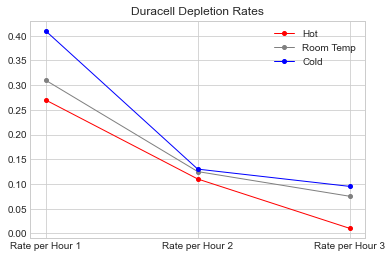

In [35]:
#Duracell Line Graphs (different colored for each condition): 
#battery
Duracell_Rates= battery_rates[(battery_rates['Brand'] == 'Duracell')]

Duracell_Rates_Roomtemp = Duracell_Rates[Duracell_Rates['Condition'] == 'Room Temp']
Duracell_Rates_Cold = Duracell_Rates[Duracell_Rates['Condition'] == 'Cold']
Duracell_Rates_Hot = Duracell_Rates[Duracell_Rates['Condition'] == 'Hot']

plt.plot(Duracell_Rates_Hot.mean(), color='red', label = 'Hot',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Duracell_Rates_Roomtemp.mean(), color='gray', label = 'Room Temp',
                     marker='o',linewidth=1, markersize=4)
 
plt.plot(Duracell_Rates_Cold.mean(), color='blue', label = 'Cold',
                     marker='o',linewidth=1, markersize=4)


plt.grid(visible=True)
plt.legend() 
plt.title('Duracell Depletion Rates')
plt.savefig("Duracell Rate.png", dpi=1200)

### Charge Changes:

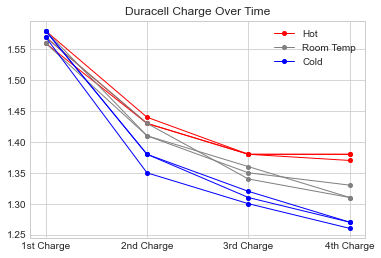

In [39]:
#Subsetting list of charges for brand
Duracell_Change= battery_change[(battery_change['Brand'] == 'Duracell')]

#Brand dropped to simplify subsetting for other columns
Duracell_Change.drop(columns='Brand', inplace=True)

Duracell_Change.rename(columns={'Start Charge 1': '1st Charge', 'Start Charge 2': '2nd Charge',
                               'Start Charge 3':'3rd Charge', 'End Charge 3':'4th Charge'}, inplace=True) 

Duracell_Change_Roomtemp = Duracell_Change[Duracell_Change['Condition'] == 'Room Temp']
#Last column can be dropped to allow for plotting:
Duracell_Change_Roomtemp.drop(columns='Condition', inplace=True)


Duracell_Change_Cold = Duracell_Change[Duracell_Change['Condition'] == 'Cold']
#Last column can be dropped to allow for plotting:
Duracell_Change_Cold.drop(columns='Condition', inplace=True)



Duracell_Change_Hot = Duracell_Change[Duracell_Change['Condition'] == 'Hot']
#Last column can be dropped to allow for plotting:
Duracell_Change_Hot.drop(columns='Condition', inplace=True)


#Hot: 
for i in range(0,len(Duracell_Change_Hot)-1): 
    plt.plot(Duracell_Change_Hot.iloc[i], color='red', label = 'Hot', 
             marker='o',linewidth=1, markersize=4)
    
#Room Temp:
for i in range(0,len(Duracell_Change_Roomtemp)-1): 
    plt.plot(Duracell_Change_Roomtemp.iloc[i], color='gray', label= 'Room Temp', 
             marker='o',linewidth=1, markersize=4)

#Cold:
for i in range(0,len(Duracell_Change_Cold)-1): 
    plt.plot(Duracell_Change_Cold.iloc[i], color='blue', label='Cold', 
             marker='o',linewidth=1, markersize=4) 



#Prevents Duplication in line graph legends: 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys()) 
plt.grid(visible=True)
plt.title('Duracell Charge Over Time')
plt.savefig("Duracell Charge.png", dpi=1200)


# Energizer Line Graphs 
### Depletion Rate Changes:

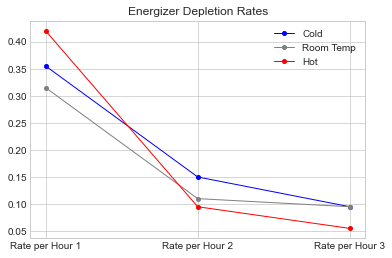

In [40]:
#Energizer Line Graphs (different colored for each condition): 

Energizer_Rates = battery_rates[(battery_rates['Brand'] == 'Energizer Max')]

Energizer_Rates_Roomtemp = Energizer_Rates[Energizer_Rates['Condition'] == 'Room Temp']
Energizer_Rates_Cold = Energizer_Rates[Energizer_Rates['Condition'] == 'Cold']
Energizer_Rates_Hot = Energizer_Rates[Energizer_Rates['Condition'] == 'Hot']

plt.plot(Energizer_Rates_Cold.mean(), color='blue', label = 'Cold',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Energizer_Rates_Roomtemp.mean(), color='gray', label = 'Room Temp',
                     marker='o',linewidth=1, markersize=4)
 
plt.plot(Energizer_Rates_Hot.mean(), color='red', label = 'Hot',
                     marker='o',linewidth=1, markersize=4)

plt.grid(visible=True)
plt.legend() 
plt.title('Energizer Depletion Rates')
plt.savefig("Energizer Rate.png", dpi=1200)

### Charge Changes:

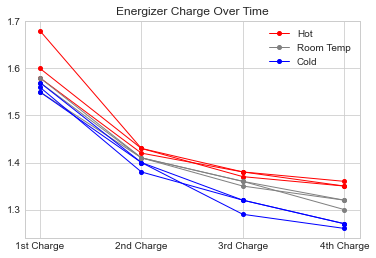

In [41]:
#Subsetting list of charges for brand
Energizer_Change= battery_change[(battery_change['Brand'] == 'Energizer Max')]

#Brand dropped to simplify subsetting for other columns
Energizer_Change.drop(columns='Brand', inplace=True)

Energizer_Change.rename(columns={'Start Charge 1': '1st Charge', 'Start Charge 2': '2nd Charge',
                               'Start Charge 3':'3rd Charge', 'End Charge 3':'4th Charge'}, inplace=True) 

Energizer_Change_Roomtemp = Energizer_Change[Energizer_Change['Condition'] == 'Room Temp']
#Last column can be dropped to allow for plotting:
Energizer_Change_Roomtemp.drop(columns='Condition', inplace=True)


Energizer_Change_Cold = Energizer_Change[Energizer_Change['Condition'] == 'Cold']
#Last column can be dropped to allow for plotting:
Energizer_Change_Cold.drop(columns='Condition', inplace=True)


#Data not yet available:
Energizer_Change_Hot = Energizer_Change[Energizer_Change['Condition'] == 'Hot']
#Last column can be dropped to allow for plotting:
Energizer_Change_Hot.drop(columns='Condition', inplace=True)

#Plotting for each condition: 
#**Find a way to only have one label for each color 
#**Find a way to title each graph for the brand

#Hot (not yet collected): 
for i in range(0,len(Energizer_Change_Hot)-1): 
    plt.plot(Energizer_Change_Hot.iloc[i], color='red', label = 'Hot', 
            marker='o',linewidth=1, markersize=4)
    
#Room Temp:
for i in range(0,len(Energizer_Change_Roomtemp)-1): 
    plt.plot(Energizer_Change_Roomtemp.iloc[i], color='gray', label= 'Room Temp', 
             marker='o',linewidth=1, markersize=4)

#Cold:
for i in range(0,len(Energizer_Change_Cold)-1): 
    plt.plot(Energizer_Change_Cold.iloc[i], color='blue', label='Cold', 
             marker='o',linewidth=1, markersize=4) 



#Prevents Duplication in line graph legends: 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys()) 
plt.grid(visible=True)
plt.title('Energizer Charge Over Time')
plt.savefig("Energizer Charge.png", dpi=1200)




# Panasonic Line Graphs 
### Depletion Rate Changes:

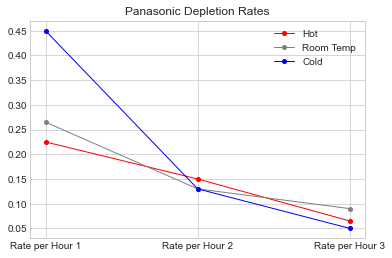

In [42]:
#Panasonic Line Graphs (different colored for each condition): 
#battery
Panasonic_Rates= battery_rates[(battery_rates['Brand'] == 'Panasonic')]

Panasonic_Rates_Roomtemp = Panasonic_Rates[Panasonic_Rates['Condition'] == 'Room Temp']
Panasonic_Rates_Cold = Panasonic_Rates[Panasonic_Rates['Condition'] == 'Cold']
Panasonic_Rates_Hot = Panasonic_Rates[Panasonic_Rates['Condition'] == 'Hot']

plt.plot(Panasonic_Rates_Hot.mean(), color='red', label = 'Hot',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Panasonic_Rates_Roomtemp.mean(), color='gray', label = 'Room Temp',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Panasonic_Rates_Cold.mean(), color='blue', label = 'Cold',
                     marker='o',linewidth=1, markersize=4)


plt.grid(visible=True)
plt.legend()  
plt.title('Panasonic Depletion Rates')
plt.savefig("Panasonic Rate.png", dpi=1200)

### Charge Changes

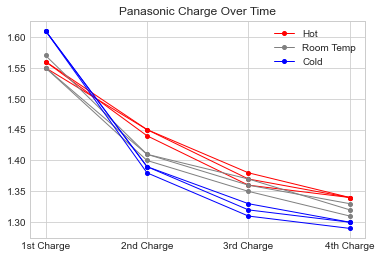

In [43]:
#Subsetting list of charges for brand
Panasonic_Change= battery_change[(battery_change['Brand'] == 'Panasonic')]

#Brand dropped to simplify subsetting for other columns
Panasonic_Change.drop(columns='Brand', inplace=True)

Panasonic_Change.rename(columns={'Start Charge 1': '1st Charge', 'Start Charge 2': '2nd Charge',
                               'Start Charge 3':'3rd Charge', 'End Charge 3':'4th Charge'}, inplace=True) 

Panasonic_Change_Roomtemp = Panasonic_Change[Panasonic_Change['Condition'] == 'Room Temp']
#Last column can be dropped to allow for plotting:
Panasonic_Change_Roomtemp.drop(columns='Condition', inplace=True)


Panasonic_Change_Cold = Panasonic_Change[Panasonic_Change['Condition'] == 'Cold']
#Last column can be dropped to allow for plotting:
Panasonic_Change_Cold.drop(columns='Condition', inplace=True)



Panasonic_Change_Hot = Panasonic_Change[Panasonic_Change['Condition'] == 'Hot']
#Last column can be dropped to allow for plotting:
Panasonic_Change_Hot.drop(columns='Condition', inplace=True)


#Hot: 
for i in range(0,len(Panasonic_Change_Hot)-1): 
    plt.plot(Panasonic_Change_Hot.iloc[i], color='red', label = 'Hot', 
             marker='o',linewidth=1, markersize=4)
    
#Room Temp:
for i in range(0,len(Panasonic_Change_Roomtemp)-1): 
    plt.plot(Panasonic_Change_Roomtemp.iloc[i], color='gray', label= 'Room Temp', 
             marker='o',linewidth=1, markersize=4)

#Cold:
for i in range(0,len(Panasonic_Change_Cold)-1): 
    plt.plot(Panasonic_Change_Cold.iloc[i], color='blue', label='Cold', 
             marker='o',linewidth=1, markersize=4) 



#Prevents Duplication in line graph legends: 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys()) 
plt.grid(visible=True)
plt.title('Panasonic Charge Over Time')
plt.savefig("Panasonic Charge.png", dpi=1200)


# Micropower Line Graphs 
### Depletion Rate Changes:

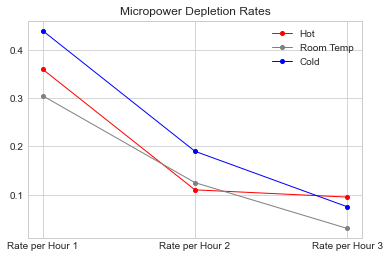

In [46]:
#Micropower Line Graphs (different colored for each condition): 
#battery
Micropower_Rates= battery_rates[(battery_rates['Brand'] == 'Micropower')]

Micropower_Rates_Roomtemp = Micropower_Rates[Micropower_Rates['Condition'] == 'Room Temp']
Micropower_Rates_Cold = Micropower_Rates[Micropower_Rates['Condition'] == 'Cold']
Micropower_Rates_Hot = Micropower_Rates[Micropower_Rates['Condition'] == 'Hot']

plt.plot(Micropower_Rates_Hot.mean(), color='red', label = 'Hot',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Micropower_Rates_Roomtemp.mean(), color='gray', label = 'Room Temp',
                     marker='o',linewidth=1, markersize=4)

plt.plot(Micropower_Rates_Cold.mean(), color='blue', label = 'Cold',
                     marker='o',linewidth=1, markersize=4)



plt.grid(visible=True)
plt.legend()  
plt.title('Micropower Depletion Rates')
plt.savefig("Micropower Rate.png", dpi=1200)

### Charge Changes:

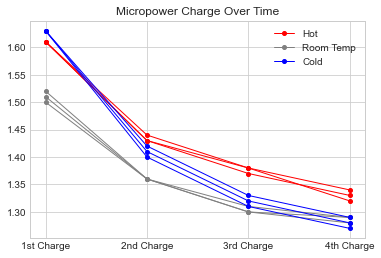

In [47]:
#Subsetting list of charges for brand
Micropower_Change= battery_change[(battery_change['Brand'] == 'Micropower')]

#Brand dropped to simplify subsetting for other columns
Micropower_Change.drop(columns='Brand', inplace=True)

Micropower_Change.rename(columns={'Start Charge 1': '1st Charge', 'Start Charge 2': '2nd Charge',
                               'Start Charge 3':'3rd Charge', 'End Charge 3':'4th Charge'}, inplace=True) 

Micropower_Change_Roomtemp = Micropower_Change[Micropower_Change['Condition'] == 'Room Temp']
#Last column can be dropped to allow for plotting:
Micropower_Change_Roomtemp.drop(columns='Condition', inplace=True)


Micropower_Change_Cold = Micropower_Change[Micropower_Change['Condition'] == 'Cold']
#Last column can be dropped to allow for plotting:
Micropower_Change_Cold.drop(columns='Condition', inplace=True)



Micropower_Change_Hot = Micropower_Change[Micropower_Change['Condition'] == 'Hot']
#Last column can be dropped to allow for plotting:
Micropower_Change_Hot.drop(columns='Condition', inplace=True)


#Hot: 
for i in range(0,len(Micropower_Change_Hot)-1): 
    plt.plot(Micropower_Change_Hot.iloc[i], color='red', label = 'Hot', 
             marker='o',linewidth=1, markersize=4)
    
#Room Temp:
for i in range(0,len(Micropower_Change_Roomtemp)-1): 
    plt.plot(Micropower_Change_Roomtemp.iloc[i], color='gray', label= 'Room Temp', 
             marker='o',linewidth=1, markersize=4)

#Cold:
for i in range(0,len(Micropower_Change_Cold)-1): 
    plt.plot(Micropower_Change_Cold.iloc[i], color='blue', label='Cold', 
             marker='o',linewidth=1, markersize=4) 



#Prevents Duplication in line graph legends: 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

 
plt.grid(visible=True)
plt.title('Micropower Charge Over Time')
plt.legend(by_label.values(), by_label.keys()) 
plt.savefig("Micropower Charge.png", dpi=1200)




## While many rates were small, no rate was particularly linear 
## A sample of any random 4 rates can show this 
## Note: The straight lines between rates appear since the index is spread out 
### If the rates were truly linear, the same rate would appear for each trial, making a horizontal line across


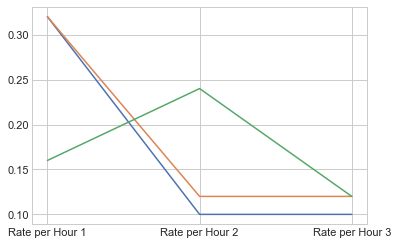

In [182]:
battery_simp = battery[battery.columns[
    battery.columns.str.contains('Rate per Hour',case = False)]]

#battery_simp only contains the rates for each trial. Short for Battery Simple
battery_simp

#Add three variables that are randomly generated 
#Must use random.choice(battery_simp.index) since...
#battery.simp's index values are not all consecutive

x1 = random.choice(battery_simp.index) 
plt.plot(battery_simp.loc[x1])

x2 = random.choice(battery_simp.index)  
plt.plot(battery_simp.loc[x2])

x3 = random.choice(battery_simp.index) 
plt.plot(battery_simp.loc[x3])  

plt.grid(visible=True)